# Import packages

In [62]:
%reset
%cd /Users/yuyuan/Desktop/Work/CMDM_Lab/COVID19_Proj_toGitHub
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
from StructuralAnalysisTools.mdPLOTtools import read_xvg, multiple_variants_plot

/Users/yuyuan/Desktop/Work/CMDM_Lab/COVID19_Proj_toGitHub


# Hydrogen-Donor-Acceptor Angle

## read xvg & plot : CLASS

In [63]:
class distribution_data_process:
    def __init__(self, do_moving_avg, variants_name, xvgfile, do_norm = False):
        self.do_moving_avg = do_moving_avg
        self.variants_name = variants_name
        self.xvgfile = xvgfile
        # quick read data: 7a91
        x_list, y_list, header_list, x_avg_list, y_avg_list = [],[],[],[],[]
        for variant in variants_name:
            wkdir = f'metadata/md_results/variants_7a91/{variant}'
            x, y, header, x_avg, y_avg = read_xvg(wkdir=wkdir, xvgfile=xvgfile, do_moving_avg=do_moving_avg)
            x_list.append(x)
            if do_norm:
                y = np.array(y)/sum(np.array(y)) # normalized
            y_list.append(y)
            header_list.append(header)
            x_avg_list.append(x_avg)
            y_avg_list.append(y_avg)

        self.pdb_7a91 = {
            "x_list":x_list,
            "y_list":y_list,
            "header_list":header_list,
            "x_avg_list":x_avg_list,
            "y_avg_list":y_avg_list
        }

        # quick read data: 6m0j
        x_list, y_list, header_list, x_avg_list, y_avg_list = [],[],[],[],[]
        for variant in variants_name:
            wkdir = f'metadata/md_results/variants_6m0j/{variant}'
            x, y, header, x_avg, y_avg = read_xvg(wkdir=wkdir, xvgfile=xvgfile, do_moving_avg=do_moving_avg)
            x_list.append(x)
            if do_norm:
                y = np.array(y)/sum(np.array(y)) # normalized
            y_list.append(y)
            header_list.append(header)
            x_avg_list.append(x_avg)
            y_avg_list.append(y_avg)

        self.pdb_6m0j = {
            "x_list":x_list,
            "y_list":y_list,
            "header_list":header_list,
            "x_avg_list":x_avg_list,
            "y_avg_list":y_avg_list
        }

        # quick read data: ground truth
        self.variants_name_groundtruth = ['WT_6m0j', 'WT_7a91', 'alpha_7mjn', 'beta_7v80', 'gamma_7v84', 'delta_7v8b']
        self.colorlist_groundtruth = ['#adadad', '#7d7d7d', '#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
        x_list, y_list, header_list, x_avg_list, y_avg_list = [],[],[],[],[]
        self.variants_groundtruth = {
            'variants_6m0j':'WT',
            'variants_7a91':'WT',
            'variants_7mjn':'alpha',
            'variants_7v80':'beta',
            'variants_7v84':'gamma',
            'variants_7v8b':'delta'
        }
        for variant_folder in self.variants_groundtruth:
            wkdir = f'metadata/md_results/{variant_folder}/{self.variants_groundtruth[variant_folder]}'
            x, y, header, x_avg, y_avg = read_xvg(wkdir=wkdir, xvgfile=xvgfile, do_moving_avg=do_moving_avg)
            x_list.append(x)
            if do_norm:
                y = np.array(y)/sum(np.array(y)) # normalized
            y_list.append(y)
            header_list.append(header)
            x_avg_list.append(x_avg)
            y_avg_list.append(y_avg)

        self.pdb_groundtruth = {
            "x_list":x_list,
            "y_list":y_list,
            "header_list":header_list,
            "x_avg_list":x_avg_list,
            "y_avg_list":y_avg_list
        }
    
    def quickplot(self, thexlabel, theylabel, colorlist):
        fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=[27,6])
        # quick plotting 6m0j
        multiple_variants_plot(title=thetitle + ' (6m0j)', xlab=thexlabel, ylab=theylabel, variants_name=self.variants_name, 
                                x_list=self.pdb_6m0j["x_list"], y_list=self.pdb_6m0j["y_list"], ax=ax1,
                                x_avg_list=self.pdb_6m0j["x_avg_list"], y_avg_list=self.pdb_6m0j["y_avg_list"], 
                                do_moving_avg=self.do_moving_avg, colorlist=colorlist)
        # quick plotting 7a91                 
        multiple_variants_plot(title=thetitle + ' (7a91)', xlab=thexlabel, ylab=theylabel, variants_name=self.variants_name, 
                                x_list=self.pdb_7a91["x_list"], y_list=self.pdb_7a91["y_list"], ax=ax2,
                                x_avg_list=self.pdb_7a91["x_avg_list"], y_avg_list=self.pdb_7a91["y_avg_list"], 
                                do_moving_avg=self.do_moving_avg, colorlist=colorlist)
        # quick plotting (ground truth)
        multiple_variants_plot(title=thetitle + ' (ground truth)', xlab=thexlabel, ylab=theylabel, variants_name=self.variants_name_groundtruth, 
                                x_list=self.pdb_groundtruth["x_list"], y_list=self.pdb_groundtruth["y_list"], ax=ax3,
                                x_avg_list=self.pdb_groundtruth["x_avg_list"], y_avg_list=self.pdb_groundtruth["y_avg_list"], 
                                do_moving_avg=self.do_moving_avg, colorlist=self.colorlist_groundtruth)



## read xvg & plot: OBJECT

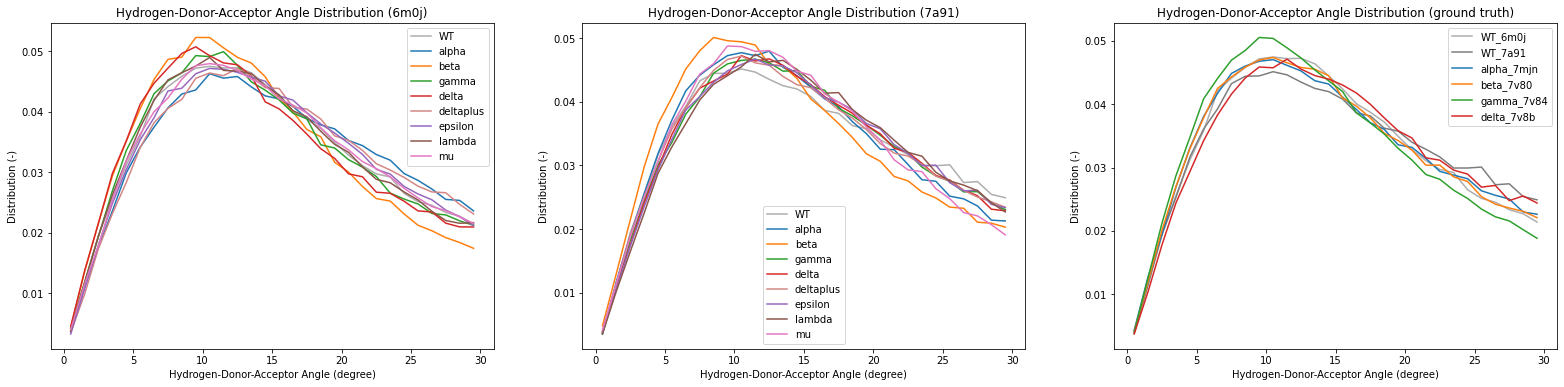

In [64]:
######### parameters ##########
do_moving_avg = False

variants_name = ['WT', 'alpha', 'beta', 'gamma', 'delta', 'deltaplus', 'epsilon', 'lambda', 'mu']
colorlist = ['#adadad', '#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#d48585', '#9467bd', '#8c564b', '#e377c2']
xvgfile = 'hbang.xvg'

thetitle = f"Hydrogen-Donor-Acceptor Angle Distribution"
thexlabel = 'Hydrogen-Donor-Acceptor Angle (degree)'
theylabel = 'Distribution (-)'

colorlist = ['#adadad', '#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#d48585', '#9467bd', '#8c564b', '#e377c2']
###############################

# read data
hbang = distribution_data_process(do_moving_avg, variants_name, xvgfile)
# plot
hbang.quickplot(thexlabel, theylabel, colorlist)

In [65]:
x_list = hbang.pdb_groundtruth['x_list']
y_list = hbang.pdb_groundtruth['y_list']
variants_name = hbang.variants_name_groundtruth

Weighted_angle = []
Max_angle = []

for index, _ in enumerate(variants_name):
    Weighted_angle.append(sum(np.array(x_list[index]) * np.array(y_list[index])))
#print(Weighted_angle)

for index, _ in enumerate(variants_name):
    Max_angle.append( x_list[index][y_list[index].index(max(y_list[index]))] )
# print(Max_angle)

df = pd.DataFrame([Weighted_angle, Max_angle]).T
df.columns = ['Weighted_angle', 'Max_angle']
df.index = variants_name
df

,Weighted_angle,Max_angle
WT_6m0j,14.763527,10.5
WT_7a91,15.153230,10.5
alpha_7mjn,14.775879,10.5
beta_7v80,14.717090,10.5
gamma_7v84,14.292721,9.5
delta_7v8b,15.156004,11.5


# H bond distance distribution

## read xvg & plot

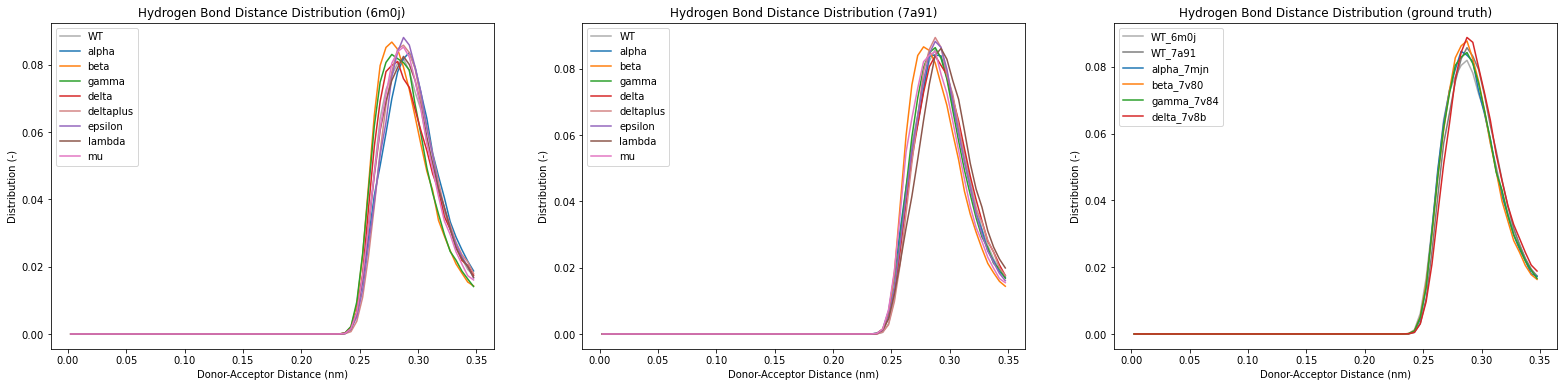

In [66]:
######### parameters ##########
do_moving_avg = False
avg_window = 1000
do_norm = True

variants_name = ['WT', 'alpha', 'beta', 'gamma', 'delta', 'deltaplus', 'epsilon', 'lambda', 'mu']
xvgfile = 'hbdist.xvg'

thetitle = f"Hydrogen Bond Distance Distribution"
thexlabel = 'Donor-Acceptor Distance (nm)'
theylabel = 'Distribution (-)'

colorlist = ['#adadad', '#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#d48585', '#9467bd', '#8c564b', '#e377c2']
###############################

hbdist = distribution_data_process(do_moving_avg, variants_name, xvgfile, do_norm)
hbdist.quickplot(thexlabel, theylabel, colorlist)

(0.23, 0.347)

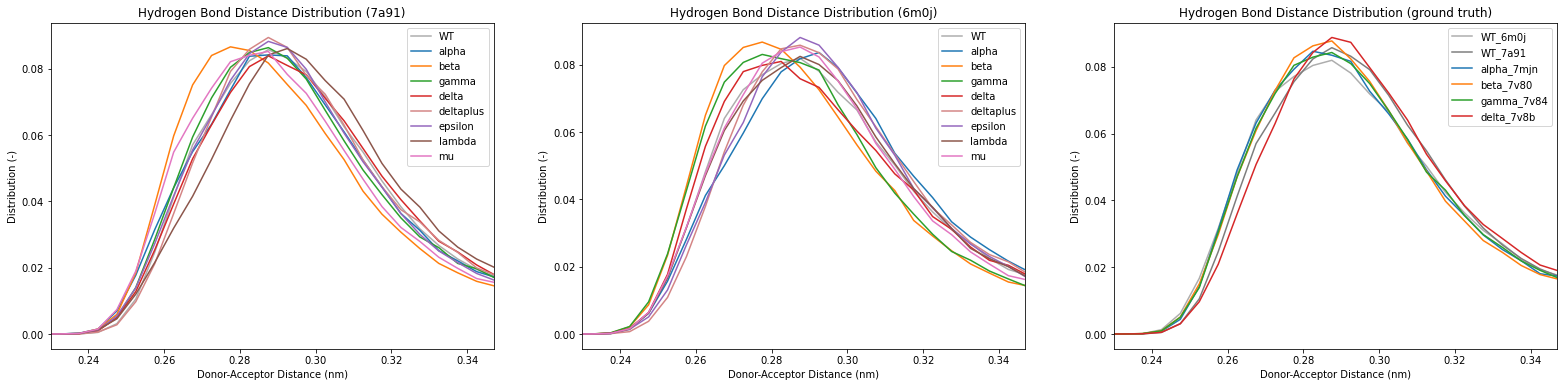

In [67]:
pdb_6m0j = hbdist.pdb_6m0j
pdb_7a91 = hbdist.pdb_7a91
pdb_groundtruth = hbdist.pdb_groundtruth
colorlist_groundtruth = hbdist.colorlist_groundtruth
variants_groundtruth = hbdist.variants_groundtruth
variants_name_groundtruth = hbdist.variants_name_groundtruth

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=[27,6])
# quick plotting                  
multiple_variants_plot(title=thetitle + ' (7a91)', xlab=thexlabel, ylab=theylabel, variants_name=variants_name, 
                        x_list=pdb_7a91["x_list"], y_list=pdb_7a91["y_list"], ax=ax1,
                        x_avg_list=pdb_7a91["x_avg_list"], y_avg_list=pdb_7a91["y_avg_list"], 
                        do_moving_avg=do_moving_avg, colorlist=colorlist)
ax1.set_xlim([0.23,0.347])

# quick plotting
multiple_variants_plot(title=thetitle + ' (6m0j)', xlab=thexlabel, ylab=theylabel, variants_name=variants_name, 
                        x_list=pdb_6m0j["x_list"], y_list=pdb_6m0j["y_list"], ax=ax2,
                        x_avg_list=pdb_6m0j["x_avg_list"], y_avg_list=pdb_6m0j["y_avg_list"], 
                        do_moving_avg=do_moving_avg, colorlist=colorlist)
ax2.set_xlim([0.23,0.347])

# quick plotting (ground truth)
multiple_variants_plot(title=thetitle + ' (ground truth)', xlab=thexlabel, ylab=theylabel, variants_name=variants_name_groundtruth, 
                        x_list=pdb_groundtruth["x_list"], y_list=pdb_groundtruth["y_list"], ax=ax3,
                        x_avg_list=pdb_groundtruth["x_avg_list"], y_avg_list=pdb_groundtruth["y_avg_list"], 
                        do_moving_avg=do_moving_avg, colorlist=colorlist_groundtruth)
ax3.set_xlim([0.23,0.347])

In [68]:
##################################
x_list = pdb_groundtruth['x_list']
y_list = pdb_groundtruth['y_list']
variants_name = hbdist.variants_name_groundtruth
##################################

Weighted_dist = []
Max_dist = []

for index, _ in enumerate(variants_name):
    Weighted_dist.append(sum(np.array(x_list[index]) * np.array(y_list[index])))
print(Weighted_dist)

for index, _ in enumerate(variants_name):
    y_list[index] = list(y_list[index])
    Max_dist.append( x_list[index][y_list[index].index(max(y_list[index]))] )
# print(Max_dist)

df = pd.DataFrame([Weighted_dist, Max_dist]).T
df.columns = ['Weighted_dist', 'Max_dist']
df.index = variants_name
df

[0.2936404095547952, 0.29524678391650383, 0.29350059029390285, 0.2932029198456234, 0.29371060181488884, 0.2960934671201591]


,Weighted_dist,Max_dist
WT_6m0j,0.293640,0.2875
WT_7a91,0.295247,0.2875
alpha_7mjn,0.293501,0.2825
beta_7v80,0.293203,0.2875
gamma_7v84,0.293711,0.2875
delta_7v8b,0.296093,0.2875
